# This project is just to explore a360

In [97]:
DATAREPO_LIST = a360ai.list_datarepos()
DATAREPO = DATAREPO_LIST['name'][0]
DATAREPO

'MindsNXT-boston-crime-1'

In [98]:
a360ai.set_default_datarepo(DATAREPO)

In [99]:
a360ai.list_datasets()

,base_name,extension,size
0,c15.csv,csv,9734104
1,c16.csv,csv,17892322
2,c17.csv,csv,18246117
3,c18.csv,csv,17872313
4,c19.csv,csv,12786668
5,c20.csv,csv,12643537
6,c21.csv,csv,12970343
7,c22.csv,csv,8708252
8,iris.csv,csv,4551
9,iris.data,data,4551


In [100]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [101]:
#iris = sb.load_dataset('iris')
df = a360ai.load_dataset('iris.csv')

In [106]:
df.rename(columns = {'5.1':'sepal_length',
                             '3.5':'sepal_width',
                             '1.4': 'petal_length',
                             '0.2' : 'petal_width',
                             'Iris-setosa' : 'species'}, inplace = True)

In [107]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [108]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [109]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [110]:
df['species'] = df['species'].map({
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
})

In [111]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


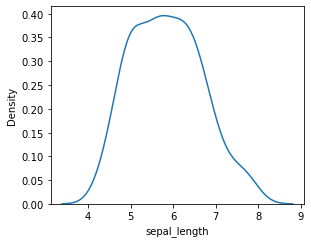

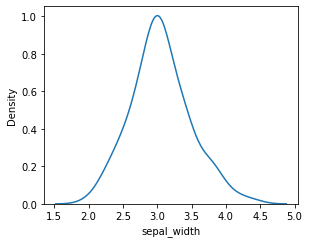

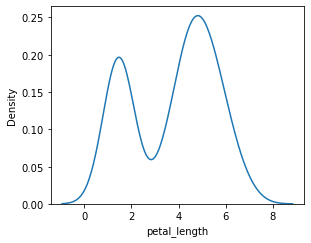

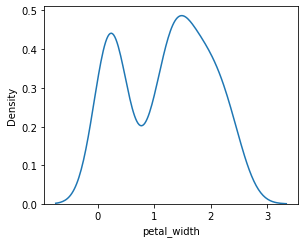

In [113]:
for i in range(len(df.columns)-1):
    plt.figure(figsize = (10, 8))
    plt.subplot(2,2,i+1)
    sb.kdeplot(data = df, x = df.columns[i])
    plt.show()

# Model

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split as tts

In [115]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
x = df.drop('species', axis = 1)
y = df['species']
x.shape, y.shape

In [116]:
x_train, x_test, y_train,y_test = tts(x,y, test_size = 0.1 )

In [117]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [118]:
model = a360ai.get_or_create_model(model_name = 'iris')

In [119]:
model

<Model iris>

In [120]:
experiment = model.get_or_create_experiment(
    experiment_name = f"iris",
    model_flavor = "sklearn",
    enable_drift_monitoring=True,
    train_features=x_train,
    train_target=y_train,
    feature_names=list(x.columns),
    model_training_file="/home/jovyan/IRIS.ipynb",
)

/opt/conda/lib/python3.10/site-packages/a360mdk/controllers/experiment.py:555: UserWarning: Concept drift monitoring of classification models is not supported. This is only supported in regression models.
  warnings.warn(



//-- Experiment Loaded --//
Model Name: iris
Experiment Name: iris
Final Run Id: None
Model Flavor: sklearn
Input Signature: ndarray: float64 (4,)
Output Signature: species big_integer
Data Exploration File: /home/jovyan/IRIS.ipynb
Data Preparation File: /home/jovyan/IRIS.ipynb
Model Training File: /home/jovyan/IRIS.ipynb
Drift Monitoring Enabled: True



In [121]:
experiments = model.list_experiments()
experiments

,id,bestRun,model_id,experiment_name,best_run_id,model_flavor,input_signature,output_signature,data_exploration_file,data_preparation_file,model_training_file,baseline,train_shape,model_name,updated_at
0,458e3d0a-8efe-4cd4-8af1-e45f7976a0c4,None,f4b7ea03-1d4c-4f82-be31-245f7eba100a,iris,None,sklearn,"ndarray: float64 (4,)",species big_integer,/home/jovyan/IRIS.ipynb,/home/jovyan/IRIS.ipynb,/home/jovyan/IRIS.ipynb,{'sepal_length': {'mean': -1.3750317756838975e...,[4],iris,2022-11-04 06:10


In [124]:
count = 1
for n in [10,15,25,50,75]:
    with experiment.run_experiment() as run:
    
        hyperparams = {
            "n_estimators": n,
            "max_depth": 6            
        }
    
        rf = RandomForestClassifier(**hyperparams)
        rf.fit(x_train, y_train)
        train_score = rf.score(x_train, y_train)
        test_score = rf.score(x_test, y_test)

        metrics = {
            "train_score": train_score,
            "test_score": test_score,
        }

        run.log_metrics(metrics)
        run.log_hyperparameters(hyperparams)
        run.log_model(rf)
        
        print("Run " + str(count) + " Complete!")
        count = count + 1 



Run 1 Complete!


/opt/conda/lib/python3.10/site-packages/a360mdk/controllers/notebook_save.py:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cells = cells.append(final_input_cell, ignore_index=True)


Run 2 Complete!


/opt/conda/lib/python3.10/site-packages/a360mdk/controllers/notebook_save.py:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cells = cells.append(final_input_cell, ignore_index=True)


Run 3 Complete!


/opt/conda/lib/python3.10/site-packages/a360mdk/controllers/notebook_save.py:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cells = cells.append(final_input_cell, ignore_index=True)


Run 4 Complete!


/opt/conda/lib/python3.10/site-packages/a360mdk/controllers/notebook_save.py:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cells = cells.append(final_input_cell, ignore_index=True)


Run 5 Complete!


/opt/conda/lib/python3.10/site-packages/a360mdk/controllers/notebook_save.py:95: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cells = cells.append(final_input_cell, ignore_index=True)


In [125]:
runs = experiment.list_runs()
runs

,id,dataset,artifact_paths,metric_test_score,metric_train_score,hyperparameter_max_depth,hyperparameter_n_estimators,metadata_run_time
0,f7e9fdd5-1796-4580-a633-890842ef0ba2,1bb34007-e460-4323-959c-36143e7b3a79,[{'id': 'd6242931-8a45-41a2-ad7c-cc7bfd97719c'...,0.933333,0.992593,6,25,0.034570
1,5e05f8a2-e656-49d3-b2f9-1b47526c9094,1bb34007-e460-4323-959c-36143e7b3a79,[{'id': 'ac675882-b968-4cb7-91c4-19b50d4d6402'...,0.933333,1.000000,6,50,0.064911
2,237b6d8e-b716-4a5f-87f7-b216968d5991,1bb34007-e460-4323-959c-36143e7b3a79,[{'id': '34c7f070-68f8-4cb3-95c6-299a25364596'...,0.933333,1.000000,6,75,0.094944
3,776fb8e7-746d-4e19-b119-8ffa492738fa,1bb34007-e460-4323-959c-36143e7b3a79,[{'id': '188e7aa4-b8ec-47c7-bb6b-ca3eb726f3bb'...,0.933333,1.000000,6,100,0.126127
4,2e4b6a63-bd98-41dd-9c85-b8e7db59285f,1bb34007-e460-4323-959c-36143e7b3a79,[{'id': 'a7235f5f-092c-46c6-a8b6-0e46d31c8b2c'...,0.933333,1.000000,6,125,0.156084
5,b652b026-15e0-4045-aa82-30d5cc255bd6,1bb34007-e460-4323-959c-36143e7b3a79,[{'id': '571ee714-f255-4bef-9f76-66182bd9678e'...,0.933333,1.000000,6,150,0.186660
6,1c51a965-3443-4a9f-89ec-13c2e10e9977,1bb34007-e460-4323-959c-36143e7b3a79,[{'id': '868d5e62-a34f-49fe-854a-1115a2dc048c'...,0.933333,1.000000,6,10,0.016933
7,dba6ba3d-97a3-42e1-89b9-d8aecba5336e,1bb34007-e460-4323-959c-36143e7b3a79,[{'id': 'debcfb5f-df74-4eaa-bdf2-05ba70051522'...,0.933333,0.992593,6,15,0.020875
8,e0fcee02-5430-47fb-8b5d-3a5a6959506f,1bb34007-e460-4323-959c-36143e7b3a79,[{'id': '439949fd-dc5d-4b86-856d-087b943a170f'...,0.933333,1.000000,6,25,0.033242
9,dd98537f-77d0-4870-8e7f-38bc90f900f1,1bb34007-e460-4323-959c-36143e7b3a79,[{'id': '686aa3bc-b86a-4e62-8501-e3c4975c4fad'...,0.933333,1.000000,6,50,0.063929


In [126]:
best_run_id = runs.sort_values("metric_test_score", ascending=False).id.values[0]
model.set_final_run(experiment, best_run_id)